In [71]:
import io
import csv
import dateutil.parser as parser
from collections import defaultdict
f = io.open('VMStats.csv')
myCsvReader = csv.DictReader(f)
limit = 10000000
i = 1
myset = {}
user = "Pool-NOAVFC171"
X_mem = {}
for row in myCsvReader:
    if i >= limit:
        break
    i = i + 1
    
    if row['VM Name'] == user:
        
        #print (l)
        #print (parser.parse(l['Date']).timestamp())
        X_mem [float(parser.parse(row['Date']).timestamp())] = float(row['VM Memory Usage(MB)'])
        #mydatetime = parser.parse(row['Date'])
        #print(mydatetime.minute)
    
#print(X_mem)    

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X = []
y = []
skipLimit = 1000
skipCounter = 1
for k in X_mem:
    X.append([k])
    y.append(X_mem[k])
    
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.39694656488549618

<Container object of 3 artists>

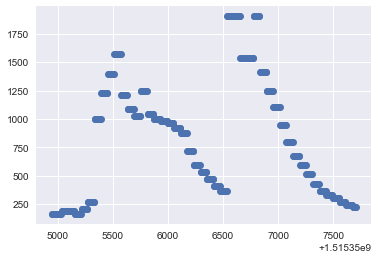

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from fig_code import visualize_tree, plot_tree_interactive

plt.errorbar(X_mem.keys(), X_mem.values(), 0.3, fmt='o')